In [232]:
import matplotlib.pyplot as plt
import skimage.io
import numpy as np
import skimage.morphology
import pandas as pd
import urllib.request as req
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
import os
from string import punctuation

In [2]:
images = skimage.io.imread("histograms.png")
hamburger = skimage.io.imread("hamburger.jpg")

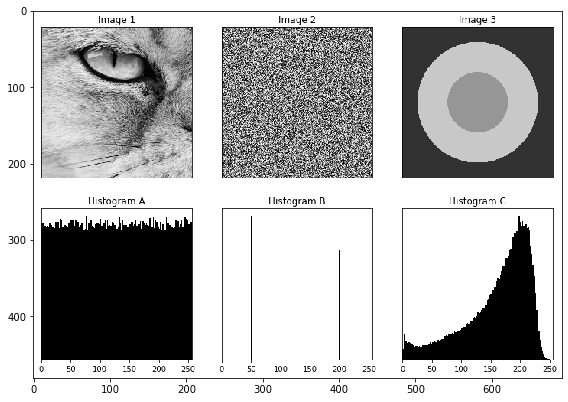

In [3]:
plt.figure(figsize=(8, 8))
skimage.io.imshow(images)
plt.show()

In [4]:
image1 = images[25:215, 20:200]
image2 = images[25:215, 250:440]
image3 = images[25:215, 485:680]

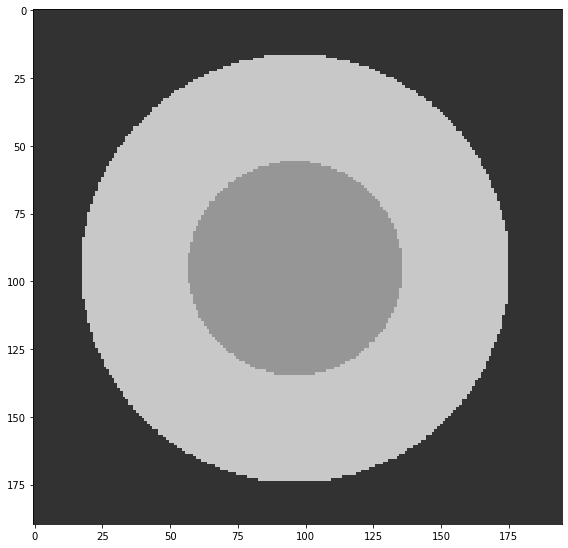

In [5]:
plt.figure(figsize=(8, 8))
skimage.io.imshow(image3)
plt.show()

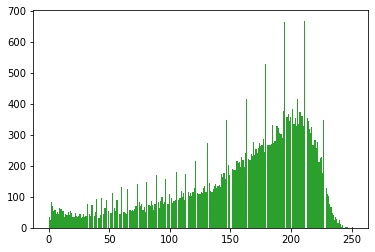

In [6]:
for x in range(3):
    plt.hist(image1[:, :, x].ravel(), bins=256)
plt.show()

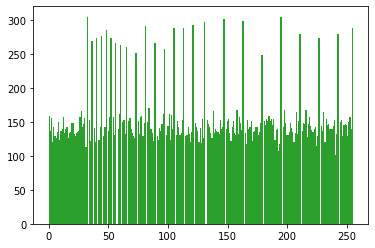

In [7]:
for x in range(3):
    plt.hist(image2[:, :, x].ravel(), bins=256)
plt.show()

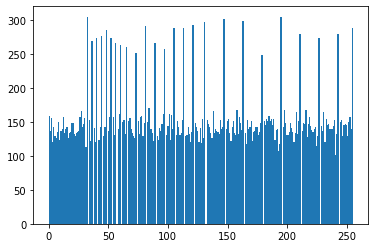

In [8]:
plt.hist(image2[:, :, 0].ravel(), bins=256)
plt.show()

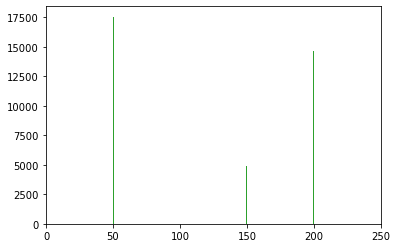

In [9]:
for x in range(3):
    plt.hist(image3[:, :, x].ravel(), bins=256)
plt.xticks(np.arange(0, 256, step=50))
plt.show()

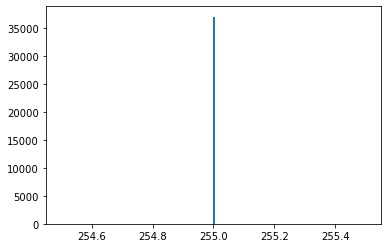

In [10]:
plt.hist(image3[:, :, 3].ravel(), bins=256)
plt.show()    

In [11]:
hamburger.shape

(417, 626, 3)

In [12]:
red, green, blue = [hamburger[:, :, x] for x in range(3)]

red: 90.08790156373304
[39 39 40 ... 25 22 23]
green: 84.07082002129926
[35 37 39 ... 23 20 21]
blue: 36.792577439645726
[50 51 53 ... 24 23 24]


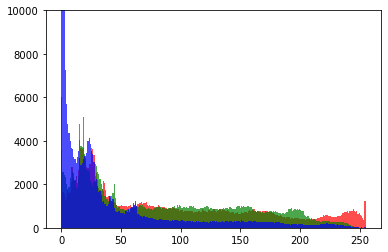

In [13]:
colors = ["red", "green", "blue"]
for x in range(3):
    channel = hamburger[:, :, x].ravel()
    plt.hist(channel, bins=256, color=colors[x], alpha=0.7)
    print(f"{colors[x]}: {channel.mean()}")
    print(channel)
plt.ylim(0, 10000)
plt.xticks(np.arange(0, 256, step=50))
plt.show()

In [14]:
hamburger[:, :, 2]

array([[50, 51, 53, ..., 23, 22, 22],
       [50, 52, 53, ..., 24, 22, 22],
       [51, 52, 53, ..., 24, 21, 21],
       ...,
       [20, 25, 29, ...,  4,  6,  5],
       [ 7, 12, 19, ..., 12,  9,  8],
       [14, 18, 17, ..., 24, 23, 24]], dtype=uint8)

In [15]:
marker = skimage.morphology.square(3)

In [16]:
marker

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [17]:
blue_channel = hamburger[:, :, 2]

In [18]:
blue_channel

array([[50, 51, 53, ..., 23, 22, 22],
       [50, 52, 53, ..., 24, 22, 22],
       [51, 52, 53, ..., 24, 21, 21],
       ...,
       [20, 25, 29, ...,  4,  6,  5],
       [ 7, 12, 19, ..., 12,  9,  8],
       [14, 18, 17, ..., 24, 23, 24]], dtype=uint8)

In [19]:
binary_opening_blue_channel = skimage.morphology.binary_opening(blue_channel, marker)

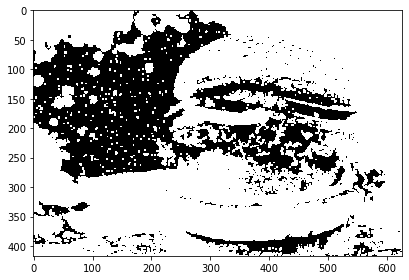

In [20]:
skimage.io.imshow(binary_opening_blue_channel)

In [21]:
blue_channel_df = pd.DataFrame(data=binary_opening_blue_channel)

In [22]:
blue_channel_df.stack().value_counts()

True     182990
False     78052
dtype: int64

In [390]:
with open('1342-0.txt', encoding="utf8") as file:
    original_text = file.read()
original_text = original_text

In [391]:
len(re.findall(r"prejudice|Prejudice|PREJUDICE", original_text))

13

In [392]:
len(re.findall(r"pride|Pride|PRIDE", original_text))

53

In [393]:
reworked_text = re.findall(r"[^\W\d_]+", original_text.lower())

In [394]:
reworked_text

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'pride',
 'and',
 'prejudice',
 'by',
 'jane',
 'austen',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'in',
 'the',
 'united',
 'states',
 'and',
 'most',
 'other',
 'parts',
 'of',
 'the',
 'world',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'org',
 'if',
 'you',
 'are',
 'not',
 'located',
 'in',
 'the',
 'united',
 'states',
 'you',
 'will',
 'have',
 'to',
 'check',
 'the',
 'laws',
 'of',
 'the',
 'country',
 'where',
 'you',
 'are',
 'located',
 'before',
 'using',
 'this',
 'ebook',
 'title',
 'pride',
 'and',
 'prejudice',
 'author',
 'jane',
 'austen',
 'release',
 'date',
 'june',
 'ebook',

In [395]:
reworked_text = Counter(reworked_text)

In [396]:
reworked_text["prejudice"]

10

In [397]:
reworked_text["pride"]

52

In [398]:
not_so_reworked_text = re.findall(r"[^\W\d_]+", original_text)

In [399]:
not_so_reworked_text = Counter(not_so_reworked_text)

In [400]:
stopwrds = set(stopwords.words("english"))

In [401]:
for x in stopwrds:
    if x in not_so_reworked_text:
        not_so_reworked_text.pop(x) 

In [402]:
dict(sorted(not_so_reworked_text.items(), key=lambda item: -item[1]))

{'I': 2070,
 'Mr': 785,
 'Elizabeth': 634,
 'could': 516,
 'would': 467,
 'Darcy': 417,
 'said': 402,
 'Mrs': 344,
 'much': 325,
 'She': 325,
 'Bennet': 323,
 'must': 317,
 'But': 317,
 'Bingley': 306,
 'Jane': 294,
 'The': 285,
 'Miss': 281,
 'one': 264,
 'It': 249,
 'know': 239,
 'He': 235,
 'You': 221,
 'sister': 218,
 'never': 214,
 'soon': 213,
 'though': 211,
 'think': 210,
 'time': 203,
 'might': 201,
 'may': 200,
 'Wickham': 194,
 'well': 188,
 'good': 187,
 'little': 187,
 'every': 184,
 'Collins': 179,
 'without': 174,
 'Lydia': 170,
 'make': 168,
 'nothing': 163,
 'shall': 161,
 'say': 158,
 'And': 152,
 'family': 151,
 'man': 150,
 'see': 150,
 'room': 150,
 'dear': 149,
 'first': 143,
 'day': 143,
 'great': 141,
 'Lady': 137,
 'mother': 137,
 'father': 135,
 'two': 130,
 'ever': 129,
 'however': 128,
 'young': 127,
 'made': 126,
 'Catherine': 126,
 'They': 125,
 'give': 124,
 'us': 124,
 'Chapter': 122,
 'hope': 121,
 'away': 119,
 'always': 119,
 'My': 118,
 'last': 118,
